<a href="https://colab.research.google.com/github/Inventrohyder/deep-learning-tutorial/blob/main/CIFAR_10_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# test harness for evaluating models on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.callbacks import History
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Model
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.initializers import he_normal

In [2]:
# load train and test dataset
def load_dataset():
 # load dataset
 (trainX, trainY), (testX, testY) = cifar10.load_data()
 # one hot encode target values
 trainY = to_categorical(trainY)
 testY = to_categorical(testY)
 return trainX, trainY, testX, testY

In [3]:
# scale pixels
def prep_pixels(train, test):
 # convert from integers to floats
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 # normalize to range 0-1
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0
 # return normalized images
 return train_norm, test_norm

In [4]:
def define_model() -> Model:
  """ This function defines the model. Most hyperparameters are located here, 
  although you can also consider data preparation to have hyperparameters. 
  Focus on modifying this part.
  """
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [5]:
# plot diagnostic learning curves
def summarize_diagnostics(history: History) -> None:
 # plot loss
 pyplot.subplot(211)
 pyplot.title('Cross Entropy Loss')
 pyplot.plot(history.history['loss'], color='blue', label='train')
 pyplot.plot(history.history['val_loss'], color='orange', label='test')
 # plot accuracy
 pyplot.subplot(212)
 pyplot.title('Classification Accuracy')
 pyplot.plot(history.history['accuracy'], color='blue', label='train')
 pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
 pyplot.legend()
 # save plot to file
 filename = sys.argv[0].split('/')[-1]
 pyplot.savefig(filename + '_plot.png')
 pyplot.show()
 pyplot.close()

In [6]:
# run the test harness for evaluating a model
def run_test_harness(model: Model):
 # load dataset
 trainX, trainY, testX, testY = load_dataset()
 # prepare pixel data
 trainX, testX = prep_pixels(trainX, testX)

 # fit model
 history = model.fit(trainX, trainY, epochs=20, batch_size=64, validation_data=(testX, testY))
 # evaluate model
 _, acc = model.evaluate(testX, testY, verbose=0)
 print('> %.3f' % (acc * 100.0))
 # learning curves
 summarize_diagnostics(history)

Epoch 1/20
782/782 [==============================] - 10s 10ms/step - loss: 1.5080 - accuracy: 0.4526 - val_loss: 1.2089 - val_accuracy: 0.5672
Epoch 2/20
782/782 [==============================] - 8s 10ms/step - loss: 1.0639 - accuracy: 0.6267 - val_loss: 1.0189 - val_accuracy: 0.6471
Epoch 3/20
782/782 [==============================] - 5s 7ms/step - loss: 0.8726 - accuracy: 0.6972 - val_loss: 0.8736 - val_accuracy: 0.6978
Epoch 4/20
782/782 [==============================] - 5s 7ms/step - loss: 0.7522 - accuracy: 0.7389 - val_loss: 0.8068 - val_accuracy: 0.7260
Epoch 5/20
782/782 [==============================] - 5s 7ms/step - loss: 0.6702 - accuracy: 0.7651 - val_loss: 0.7785 - val_accuracy: 0.7309
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 0.5967 - accuracy: 0.7917 - val_loss: 0.7481 - val_accuracy: 0.7429
Epoch 7/20
782/782 [==============================] - 5s 7ms/step - loss: 0.5361 - accuracy: 0.8108 - val_loss: 0.7436 - val_accuracy: 0.7501
Epo

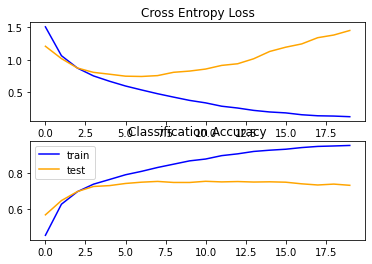

In [7]:
# entry point, run the test harness
run_test_harness(model = define_model())

The model above is **overfitting** because the accuracy of the model
on the training data keeps on improving but that of the testing
data doesn't.

Epoch 1/20
782/782 [==============================] - 6s 7ms/step - loss: 1.5121 - accuracy: 0.4515 - val_loss: 1.2046 - val_accuracy: 0.5709
Epoch 2/20
782/782 [==============================] - 5s 7ms/step - loss: 1.0926 - accuracy: 0.6163 - val_loss: 1.0018 - val_accuracy: 0.6468
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 0.9195 - accuracy: 0.6782 - val_loss: 0.8946 - val_accuracy: 0.6852
Epoch 4/20
782/782 [==============================] - 5s 6ms/step - loss: 0.7872 - accuracy: 0.7254 - val_loss: 0.8698 - val_accuracy: 0.6966
Epoch 5/20
782/782 [==============================] - 5s 7ms/step - loss: 0.6960 - accuracy: 0.7563 - val_loss: 0.7994 - val_accuracy: 0.7225
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 0.6251 - accuracy: 0.7816 - val_loss: 0.7824 - val_accuracy: 0.7367
Epoch 7/20
782/782 [==============================] - 5s 6ms/step - loss: 0.5598 - accuracy: 0.8018 - val_loss: 0.7723 - val_accuracy: 0.7412
Epoch 

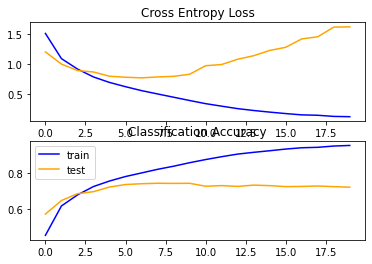

In [8]:
def define_model_xavier() -> Model:
  """
  Add the Glorot / Xavier Initializer
  """
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(10, activation='softmax', kernel_initializer='glorot_uniform'))
  # compile model
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# entry point, run the test harness
run_test_harness(model = define_model_xavier())

Epoch 1/20
782/782 [==============================] - 6s 7ms/step - loss: 1.4917 - accuracy: 0.4513 - val_loss: 1.2309 - val_accuracy: 0.5565
Epoch 2/20
782/782 [==============================] - 5s 6ms/step - loss: 1.0704 - accuracy: 0.6249 - val_loss: 0.9758 - val_accuracy: 0.6556
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 0.8758 - accuracy: 0.6954 - val_loss: 0.8587 - val_accuracy: 0.6988
Epoch 4/20
782/782 [==============================] - 5s 6ms/step - loss: 0.7605 - accuracy: 0.7334 - val_loss: 0.7900 - val_accuracy: 0.7277
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 0.6677 - accuracy: 0.7676 - val_loss: 0.7594 - val_accuracy: 0.7374
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 0.6086 - accuracy: 0.7859 - val_loss: 0.7762 - val_accuracy: 0.7404
Epoch 7/20
782/782 [==============================] - 5s 6ms/step - loss: 0.5393 - accuracy: 0.8112 - val_loss: 0.7842 - val_accuracy: 0.7371
Epoch 

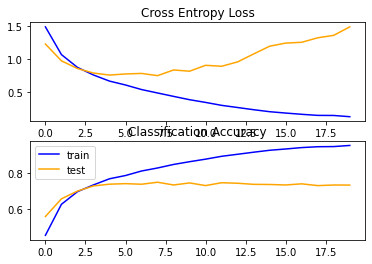

In [9]:
def define_model_xavier_all() -> Model:
  """
  Add the Glorot / Xavier Initializer to all layers
  """
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='glorot_uniform'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# entry point, run the test harness
run_test_harness(model = define_model_xavier_all())

Epoch 1/20
782/782 [==============================] - 6s 7ms/step - loss: 1.4084 - accuracy: 0.4913 - val_loss: 1.0646 - val_accuracy: 0.6216
Epoch 2/20
782/782 [==============================] - 5s 6ms/step - loss: 0.9681 - accuracy: 0.6612 - val_loss: 0.9046 - val_accuracy: 0.6850
Epoch 3/20
782/782 [==============================] - 5s 7ms/step - loss: 0.7781 - accuracy: 0.7279 - val_loss: 0.8512 - val_accuracy: 0.7077
Epoch 4/20
782/782 [==============================] - 5s 6ms/step - loss: 0.6573 - accuracy: 0.7701 - val_loss: 0.8136 - val_accuracy: 0.7201
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 0.5573 - accuracy: 0.8069 - val_loss: 0.8078 - val_accuracy: 0.7284
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 0.4641 - accuracy: 0.8367 - val_loss: 0.8416 - val_accuracy: 0.7304
Epoch 7/20
782/782 [==============================] - 5s 6ms/step - loss: 0.3919 - accuracy: 0.8624 - val_loss: 0.8564 - val_accuracy: 0.7307
Epoch 

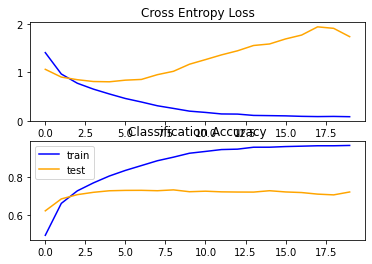

In [10]:
def define_model_he_all() -> Model:
  """
  Add the he Initializer to all layers
  """
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# entry point, run the test harness
run_test_harness(model = define_model_he_all())

Epoch 1/20
782/782 [==============================] - 6s 7ms/step - loss: 1.4541 - accuracy: 0.4744 - val_loss: 1.2129 - val_accuracy: 0.5742
Epoch 2/20
782/782 [==============================] - 5s 6ms/step - loss: 1.0231 - accuracy: 0.6410 - val_loss: 0.9500 - val_accuracy: 0.6660
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 0.8369 - accuracy: 0.7065 - val_loss: 0.8263 - val_accuracy: 0.7131
Epoch 4/20
782/782 [==============================] - 5s 7ms/step - loss: 0.7220 - accuracy: 0.7479 - val_loss: 0.8671 - val_accuracy: 0.7002
Epoch 5/20
782/782 [==============================] - 5s 7ms/step - loss: 0.6400 - accuracy: 0.7779 - val_loss: 0.7774 - val_accuracy: 0.7353
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 0.5727 - accuracy: 0.8007 - val_loss: 0.7871 - val_accuracy: 0.7389
Epoch 7/20
782/782 [==============================] - 5s 6ms/step - loss: 0.5076 - accuracy: 0.8224 - val_loss: 0.7841 - val_accuracy: 0.7499
Epoch 

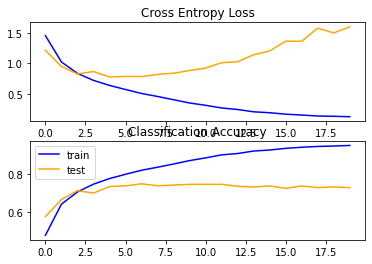

In [11]:
def define_model_lecun_all() -> Model:
  """
  Add the he Initializer to all layers
  """
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='lecun_normal', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='lecun_normal'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='lecun_normal'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='lecun_normal'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='lecun_normal'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# entry point, run the test harness
run_test_harness(model = define_model_lecun_all())

Epoch 1/20
782/782 [==============================] - 8s 9ms/step - loss: 1.2080 - accuracy: 0.5702 - val_loss: 1.1215 - val_accuracy: 0.5958
Epoch 2/20
782/782 [==============================] - 6s 7ms/step - loss: 0.8227 - accuracy: 0.7105 - val_loss: 0.9614 - val_accuracy: 0.6690
Epoch 3/20
782/782 [==============================] - 6s 7ms/step - loss: 0.6579 - accuracy: 0.7706 - val_loss: 0.8022 - val_accuracy: 0.7263
Epoch 4/20
782/782 [==============================] - 6s 8ms/step - loss: 0.5475 - accuracy: 0.8090 - val_loss: 0.8020 - val_accuracy: 0.7267
Epoch 5/20
782/782 [==============================] - 6s 7ms/step - loss: 0.4604 - accuracy: 0.8384 - val_loss: 0.7476 - val_accuracy: 0.7518
Epoch 6/20
782/782 [==============================] - 6s 7ms/step - loss: 0.3749 - accuracy: 0.8702 - val_loss: 0.8001 - val_accuracy: 0.7443
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 0.3100 - accuracy: 0.8931 - val_loss: 0.9254 - val_accuracy: 0.7240
Epoch 

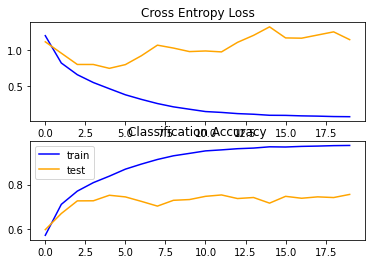

In [15]:
def define_model_he_all_batch() -> Model:
  """
  Add the he Initializer to all layers
  """
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), kernel_initializer=he_normal()))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3), kernel_initializer=he_normal()))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), kernel_initializer=he_normal()))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3), kernel_initializer=he_normal()))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, kernel_initializer=he_normal()))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

run_test_harness(model = define_model_he_all_batch())

Epoch 1/20
782/782 [==============================] - 8s 9ms/step - loss: 1.7739 - accuracy: 0.3626 - val_loss: 2.7704 - val_accuracy: 0.2183
Epoch 2/20
782/782 [==============================] - 7s 8ms/step - loss: 1.4023 - accuracy: 0.4932 - val_loss: 3.0020 - val_accuracy: 0.2124
Epoch 3/20
782/782 [==============================] - 7s 9ms/step - loss: 1.2628 - accuracy: 0.5483 - val_loss: 2.8527 - val_accuracy: 0.2132
Epoch 4/20
782/782 [==============================] - 7s 8ms/step - loss: 1.1756 - accuracy: 0.5824 - val_loss: 2.4441 - val_accuracy: 0.2235
Epoch 5/20
782/782 [==============================] - 7s 9ms/step - loss: 1.1022 - accuracy: 0.6122 - val_loss: 2.6666 - val_accuracy: 0.2004
Epoch 6/20
782/782 [==============================] - 7s 9ms/step - loss: 1.0474 - accuracy: 0.6314 - val_loss: 2.2980 - val_accuracy: 0.2637
Epoch 7/20
782/782 [==============================] - 7s 9ms/step - loss: 0.9918 - accuracy: 0.6509 - val_loss: 2.8873 - val_accuracy: 0.1898
Epoch 

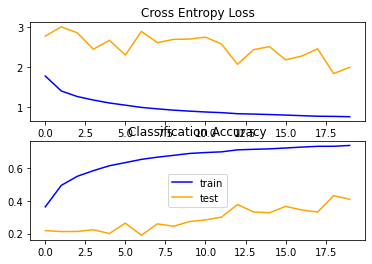

In [17]:
def define_model_he_all_batch_with_dropout() -> Model:
  """
  Add the he Initializer to all layers
  """
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), kernel_initializer=he_normal()))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Conv2D(32, (3, 3), kernel_initializer=he_normal()))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), kernel_initializer=he_normal()))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Conv2D(64, (3, 3), kernel_initializer=he_normal()))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, kernel_initializer=he_normal()))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

run_test_harness(model = define_model_he_all_batch_with_dropout())